In [ ]:
pip install  tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 27kB/s 
     |████████████████████████████████| 450kB 31.3MB/s 
     |████████████████████████████████| 51kB 8.2MB/s 
     |████████████████████████████████| 3.9MB 53.2MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=71b0de01562a61881e6d256d3e98325559707f62963adbed3d944cef4ca56277
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninsta

In [ ]:
pip install keras==2.2.4


     |████████████████████████████████| 317kB 8.0MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [ ]:
import tensorflow.keras
tensorflow.keras.__version__

'2.2.4-tf'

In [ ]:
import tensorflow as tf
tf.__version__

'2.1.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import keras
import tensorflow
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
# for accuracy and loss graph
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from tensorflow.python.keras.models import Sequential
import numpy

In [ ]:
train_data_path = "/content/drive/MyDrive/dataset/train"
validation_data_path = "/content/drive/MyDrive/dataset/valid"

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [ ]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(200, 200), # all images will be resized to 150x150
                                      batch_size=128,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 3649 images belonging to 2 classes.


In [ ]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)

# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(200,200),
                                  batch_size=128,
                                  class_mode='binary')

Found 806 images belonging to 2 classes.


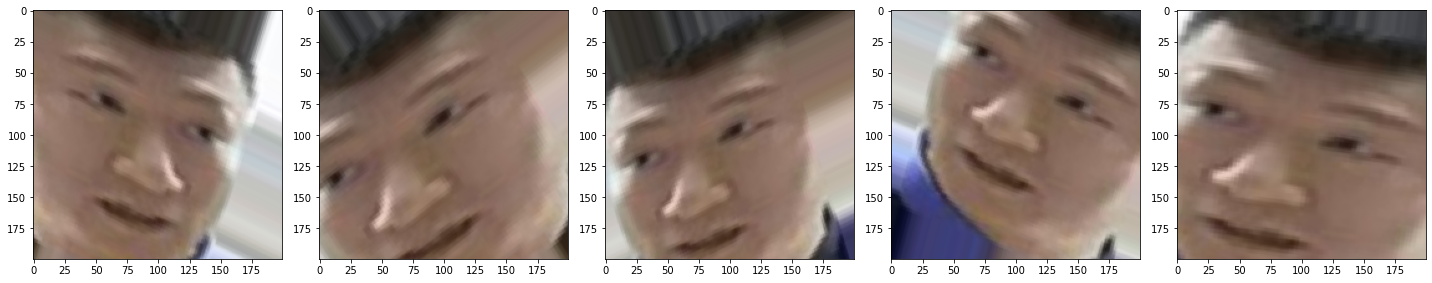

In [ ]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [ ]:
model_path = '/content/drive/MyDrive/dataset/model/model.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from keras.optimizers import Adam
from keras.optimizers import adam
from tensorflow.keras.callbacks import EarlyStopping




In [ ]:

#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=5, input_shape=[200, 200, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(4,4)),
                                    keras.layers.Conv2D(filters=64, kernel_size=4),
                                    keras.layers.MaxPooling2D(pool_size=(3,3)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=2),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=2, activation='softmax') # output layer
])


# compile cnn model
cnn_model.compile(optimizer= 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#cnn_model.compile(optimizer = Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
tf.compat.v1.disable_eager_execution()
print(tf.compat.v1.get_default_graph())

In [ ]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=50, 
                          verbose=1, 
                          validation_data= valid_data
                          ) # time start 14.25

Epoch 1/50
20/29 [===================>..........] - ETA: 43s - loss: 0.5755 - accuracy: 0.6880

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


29/29 [==============================] - 352s 12s/step - loss: 0.5101 - accuracy: 0.7473 - val_loss: 0.2047 - val_accuracy: 0.9256
Epoch 2/50
29/29 [==============================] - 32s 1s/step - loss: 0.3161 - accuracy: 0.8816 - val_loss: 0.2132 - val_accuracy: 0.9231
Epoch 3/50
29/29 [==============================] - 44s 2s/step - loss: 0.3104 - accuracy: 0.8885 - val_loss: 0.1900 - val_accuracy: 0.9293
Epoch 4/50
29/29 [==============================] - 44s 2s/step - loss: 0.2911 - accuracy: 0.8959 - val_loss: 0.1903 - val_accuracy: 0.9491
Epoch 5/50
29/29 [==============================] - 44s 2s/step - loss: 0.2551 - accuracy: 0.9071 - val_loss: 0.1328 - val_accuracy: 0.9504
Epoch 6/50
29/29 [==============================] - 44s 2s/step - loss: 0.2485 - accuracy: 0.9065 - val_loss: 0.1352 - val_accuracy: 0.9516
Epoch 7/50
29/29 [==============================] - 44s 2s/step - loss: 0.2435 - accuracy: 0.9090 - val_loss: 0.1201 - val_accuracy: 0.9529
Epoch 8/50
29/29 [===========

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(cnn_model.history['loss'], label='train loss')
plt.plot(cnn_model.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(cnn_model.history['accuracy'], label='train acc')
plt.plot(cnn_model.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
cnn_model.save('/content/drive/MyDrive/dataset/model/model.h5')